Sea $F=((x+1)^2 ,y)$ el campo de velocidades de un fluido y $C$ la circunferencia de radio $R$ centrada en el origen.

(a) Representar la circunferencia

(b) Representar el campo de velocidades

(c) Calcular el flujo a través de la circunferencia
$$
\int F\cdot n\,dt
$$
donde $n$ es el vector normal unitario exterior

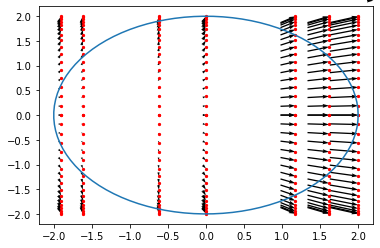

In [22]:
import numpy as np
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

t=np.linspace(0,2*np.pi,100)
R=2
x=R*np.cos(t);y=R*np.sin(t)
plt.plot(x,y)


m=20
tv=np.linspace(0,2*np.pi,m+1)
x=R*np.cos(tv);y=R*np.sin(t)


X, Y = np.meshgrid(x, y)
F1=(X+1)**2; F2=Y
#Q=plt.quiver(X,Y,F1,F2)
Q=plt.quiver(X[::3, ::3], Y[::3, ::3],F1[::3, ::3],F2[::3, ::3],pivot='tip',)
qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',coordinates='figure')
ax1.scatter(X[::3, ::3], Y[::3, ::3], color='r', s=5)
plt.show()

r(t)=(R*cos(t), R*sin(t) ) parametrización

In [16]:
#Modo 1: para ellos queda oscuro
import sympy as sp
import sympy.vector as sv

x,y,z,t=sp.symbols('x,y,z,t')
R=sv.CoordSys3D('R')
c=2*sp.cos(t)*R.i+2*sp.sin(t)*R.j
dc=sp.diff(c)
print(dc)
def F(x,y):
    return (x+1)**2*R.i+y*R.j

def Fc(c):
    x=c.dot(R.i);y= c.dot(R.j)
    return F(x,y)

n=(dc.dot(R.j))*R.i - (dc.dot(R.i))*R.j
print("n= ",n)

f=Fc(c).dot(n)
print("f= ",f)
Flujo=sp.integrate(f,(t,0,2*sp.pi))
print("Flujo= ",Flujo)

#comprobamos que rot(F)=0
f=(x+1)**2*R.i+y*R.j
f2x=sp.diff(f.dot(R.j),x)
f1y=sp.diff(f.dot(R.i),y)
print("rot= ", f2x-f2x)


(-2*sin(t))*R.i + (2*cos(t))*R.j
n=  (2*cos(t))*R.i + (2*sin(t))*R.j
f=  2*(2*cos(t) + 1)**2*cos(t) + 4*sin(t)**2
Flujo=  12*pi
rot=  0


In [21]:
#Modo 2
x,y,z,t=sp.symbols('x,y,z,t')
c=[2*sp.cos(t), 2*sp.sin(t)]
dc=[sp.diff(c[k]) for k in [0,1]]
n=[dc[1],-dc[0]]
print("n= ",n)
F=[(x+1)**2,y]
Fc=[F[k].subs([(x,c[0]),(y,c[1])]) for k in [0,1]  ]
f=Fc[0]*n[0]+Fc[1]*n[1]
print(f)
Flujo=sp.integrate(f,(t,0,2*sp.pi))
print("Flujo= ", Flujo)


#Modo 3: Aplicando el teorema de la divergencia
divF=sp.diff(F[0],x)+sp.diff(F[1],y)
ro,theta=sp.symbols('ro,theta')
divF=divF.subs([(x,ro*sp.cos(theta)),(y,ro*sp.sin(theta))])
flujo=sp.integrate(divF*ro,(theta,0,2*sp.pi),(ro,0,2))
print("flujo (via divergencia)= ",flujo)

n=  [2*cos(t), 2*sin(t)]
2*(2*cos(t) + 1)**2*cos(t) + 4*sin(t)**2
Flujo=  12*pi
flujo (via divergencia)=  12*pi


#Limpiar la memoria de ipython

%reset      #Limpia todas las varibles de memoria en la ipython


%reset -f   #No requiere confirmación del usuario


#Podemos poner las siguientes líneas de código en nuestro fichero .py


from IPython import get_ipython

get_ipython().magic('reset -sf')
